<a href="https://colab.research.google.com/github/raopk/AIED/blob/main/NLP_%26_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP (Natural Language Processing) or Text Mining**
-------------------------------------------------------------

1. Data Assemble
2. Data Pre-Preprocessing
3. Data Exploration
4. Build Model

**Data Assemble: **
---------------------

Direct Communication, Inferred Behaviour, Social communication, --> Corpus --> Pre-Process --> Word Cloud

Library/Package :  textract



In [ ]:
#Data Assemble
#Read the data from multiple sources
#a. PDF Documents
#b. Scanned Document/Camtasia Recorder (Whatsapp)
#c. Audio Files


In [ ]:
# Setup for Extraction of unstructured text data
# Update my Google Colab and Install Textract Library
!apt-get update

In [ ]:
#Setup Textract Library on Google Colab
import textract
#ModuleNotFoundError: No module named 'textract' because Google doesn't provide dependent 
#linux library for textract.
# we will be pip or easy install to install extract

In [ ]:
# check the type of OS /Linux
!uname -a

Linux 94a296f56a54 4.14.79+ #1 SMP Wed Dec 19 21:19:13 PST 2018 x86_64 x86_64 x86_64 GNU/Linux


In [ ]:
#Setup Textract for extracting text from different sources
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils \
 pstotext tesseract-ocr \
 flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libasound2-dev libpulse-dev

!pip install git+https://github.com/deanmalmgren/textract
  
#Restart to bring-in effect Textract - You must restart the runtime in order to use newly installed versions.

In [ ]:
#Now import the textract
import textract

#Demo 1: Extract text from PDF Files
# Step 1: Download the file on Google Colab
!wget https://newsroom.intel.com/wp-content/uploads/sites/11/2018/03/smart-cities-whats-in-it-for-citizens.pdf

#file we would get "smart-cities-whats-in-it-for-citizens.pdf"

--2019-02-13 14:47:34--  https://newsroom.intel.com/wp-content/uploads/sites/11/2018/03/smart-cities-whats-in-it-for-citizens.pdf
Resolving newsroom.intel.com (newsroom.intel.com)... 23.53.116.6
Connecting to newsroom.intel.com (newsroom.intel.com)|23.53.116.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962023 (939K) [application/pdf]
Saving to: ‘smart-cities-whats-in-it-for-citizens.pdf.2’

smart-cities-whats- 100%[===================>] 939.48K  --.-KB/s    in 0.07s   

2019-02-13 14:47:34 (13.1 MB/s) - ‘smart-cities-whats-in-it-for-citizens.pdf.2’ saved [962023/962023]



In [ ]:
# Step 2 - Read the content from the PDF file
text = textract.process("smart-cities-whats-in-it-for-citizens.pdf")
text = str(text)
print("Type of text", type(text))
#print("Show content from pdf \n", text)


Type of text <class 'str'>


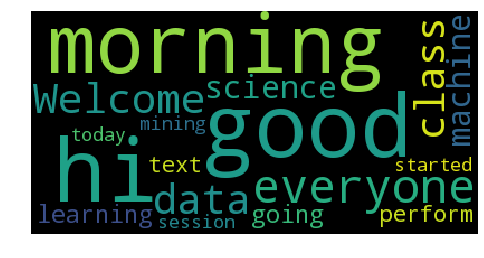

In [ ]:
#Remove some special characters out
import re
text = re.sub("xe2","",text)
text = re.sub("x80","",text)
text = re.sub("x99","",text)
text = re.sub("x0c","",text)
text = re.sub("x93","",text)
text = re.sub("nCase Study","",text)



#Explore the pdf content using the wordcloud
from wordcloud import WordCloud
wc = WordCloud().generate(text)


import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
  #plt.title(url)
  #print(url)
plt.show()
 

In [ ]:
# Demo 2: Extract the content from Scanned Document (any)

#Step 1: Download the file
!wget http://hackveda.in/air_ticket.pdf

--2019-02-13 14:11:17--  http://hackveda.in/air_ticket.pdf
Resolving hackveda.in (hackveda.in)... 192.185.129.82
Connecting to hackveda.in (hackveda.in)|192.185.129.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414795 (405K) [application/pdf]
Saving to: ‘air_ticket.pdf.1’

air_ticket.pdf.1    100%[===================>] 405.07K  1010KB/s    in 0.4s    

2019-02-13 14:11:18 (1010 KB/s) - ‘air_ticket.pdf.1’ saved [414795/414795]



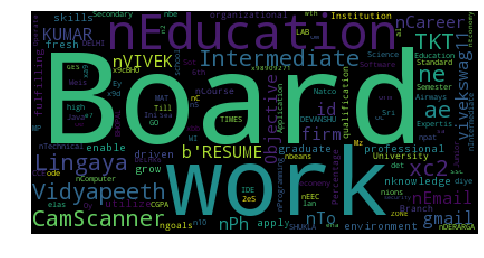

In [ ]:
#Step 2: Extract text from Scanned PDF
text = str(textract.process("air_ticket.pdf", method="tesseract"))
#print(text)

#Remove some special characters out
import re
text = re.sub("xe2","",text)
text = re.sub("x80","",text)
text = re.sub("x99","",text)
text = re.sub("x0c","",text)
text = re.sub("x93","",text)
text = re.sub("nScanned","",text)
text = re.sub("\n","",text)

wc = WordCloud().generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
# Demo 3: Extract text from Images
!wget http://hackveda.in/air_ticket1.jpg
text = textract.process("air_ticket1.jpg", method="tesseract")

#print(text)

--2019-02-13 15:31:00--  http://hackveda.in/air_ticket1.jpg
Resolving hackveda.in (hackveda.in)... 192.185.129.82
Connecting to hackveda.in (hackveda.in)|192.185.129.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191073 (187K) [image/jpeg]
Saving to: ‘air_ticket1.jpg.3’

air_ticket1.jpg.3   100%[===================>] 186.59K   855KB/s    in 0.2s    

2019-02-13 15:31:00 (855 KB/s) - ‘air_ticket1.jpg.3’ saved [191073/191073]



--2019-02-13 14:32:56--  http://www.hackveda.in/dev.mp3
Resolving www.hackveda.in (www.hackveda.in)... 192.185.129.82
Connecting to www.hackveda.in (www.hackveda.in)|192.185.129.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 458496 (448K) [audio/mpeg]
Saving to: ‘dev.mp3.7’

dev.mp3.7           100%[===================>] 447.75K  1.01MB/s    in 0.4s    

2019-02-13 14:32:57 (1.01 MB/s) - ‘dev.mp3.7’ saved [458496/458496]

b"hi good morning everyone Welcome to our class on data science and machine learning we are going to perform text mining in today's session and let's get started\n"


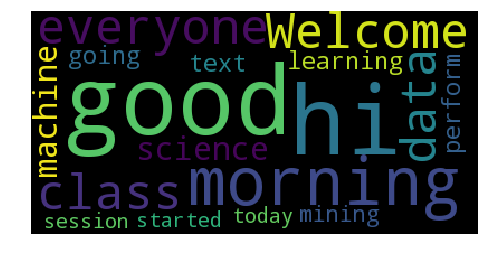

In [ ]:
# Demo 4 : Extract text content from audio files/ voice calls
!wget http://www.hackveda.in/dev.mp3
text = str(textract.process("dev.mp3"))
print(text)
wc = WordCloud().generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()


